In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('raw_data/carData.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
valeurs_uniques = df['Seller_Type'].unique()
valeurs_uniques


['Dealer' 'Individual']


In [43]:
valeurs_uniques = df['Transmission'].unique()
valeurs_uniques

array(['Manual', 'Automatic'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'Present_Price'}>],
       [<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Owner'}>,
        <Axes: title={'center': 'Fuel_Type_number'}>],
       [<Axes: title={'center': 'Seller_Type_number'}>,
        <Axes: title={'center': 'Transmission_number'}>, <Axes: >]],
      dtype=object)

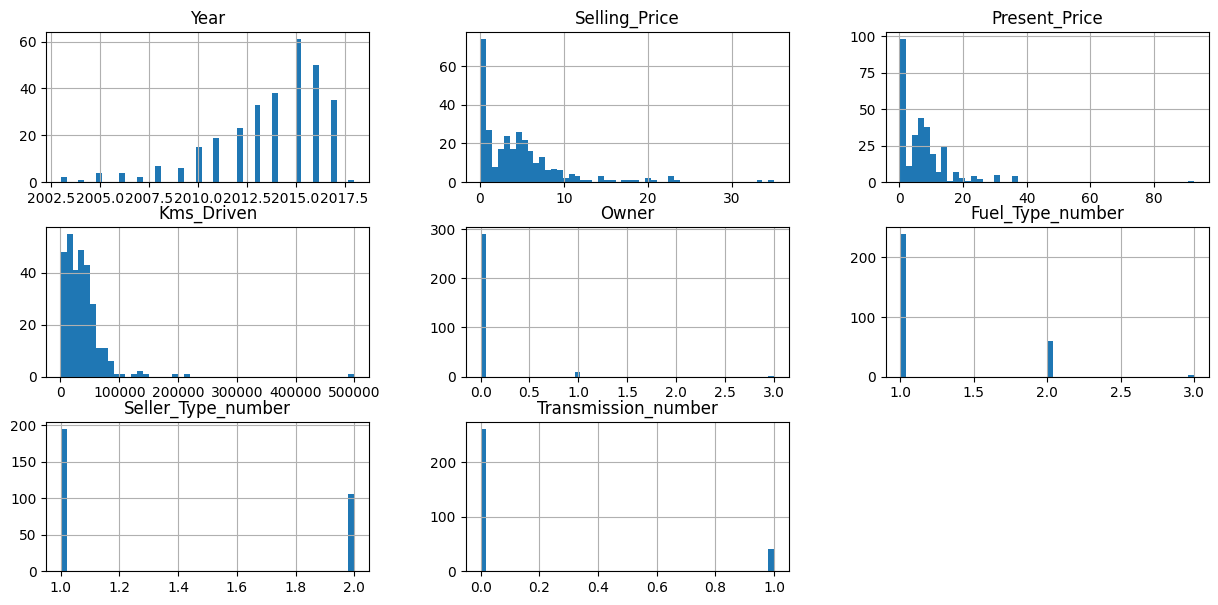

In [56]:
df.hist(bins=50, figsize=(15,7))

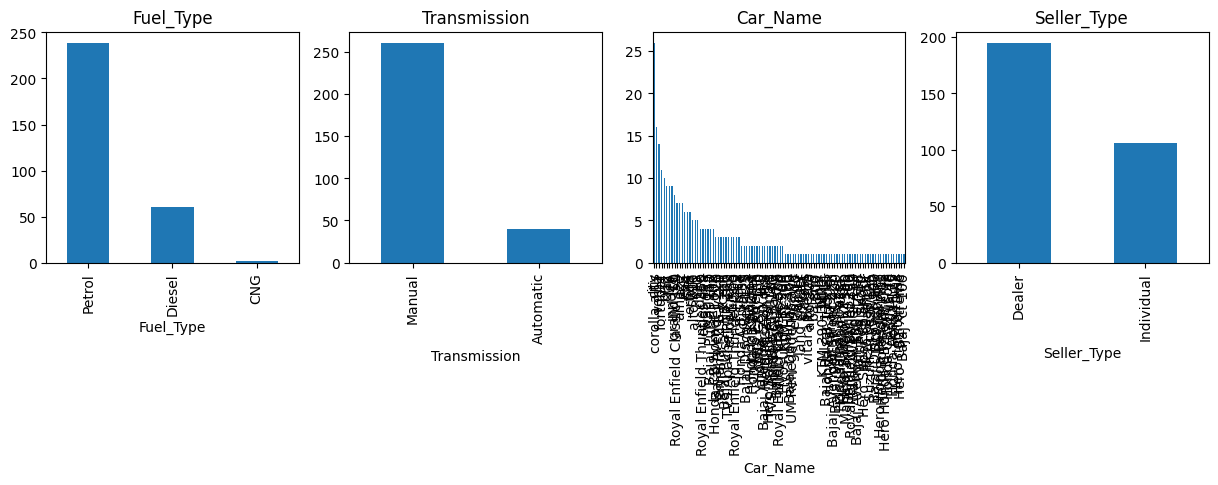

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

colonnes = ['Fuel_Type', 'Transmission', 'Car_Name', 'Seller_Type']

for ax, col in zip(axes.flatten(), colonnes):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)



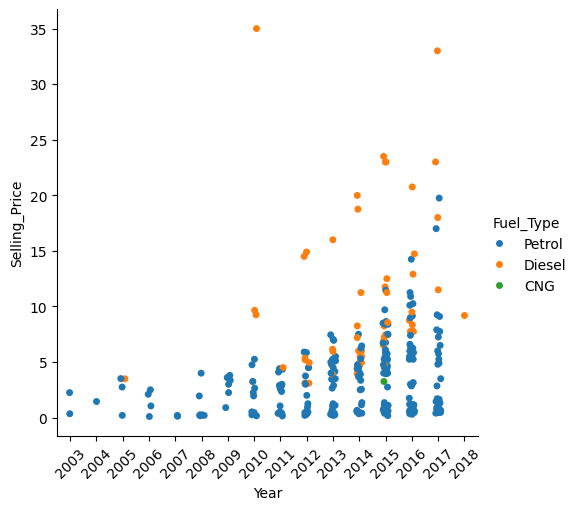

In [31]:
# catplot
g = sns.catplot(x="Year", y="Selling_Price", 
                hue="Fuel_Type", 
                data=df)
# Pivoter les étiquettes de l'axe x
plt.xticks(rotation=45) 

# Alternative: accéder aux axes et modifier les étiquettes
# g.set_xticklabels(rotation=45)

# Pour s'assurer que les étiquettes ne sont pas coupées
#plt.tight_layout()

g

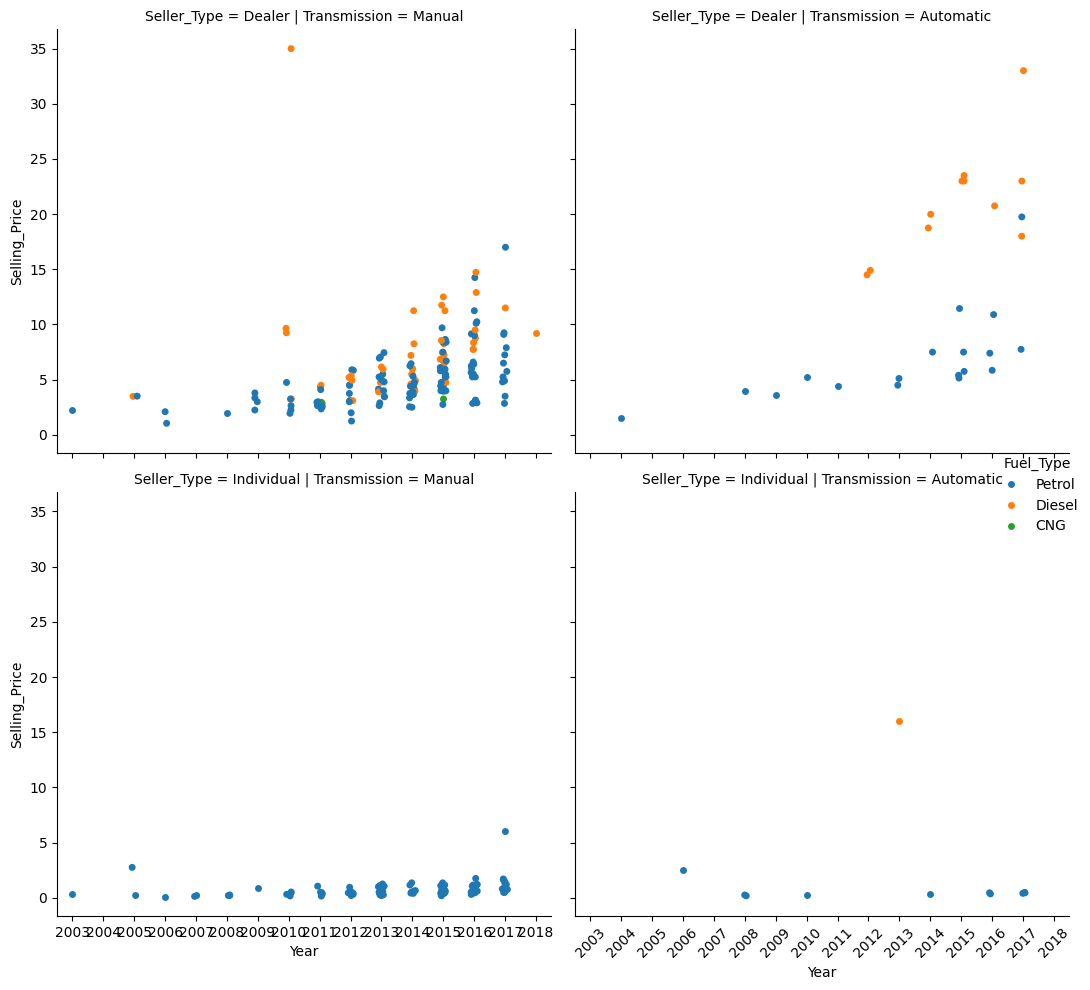

In [32]:
# Option 2: Ajouter row pour créer une grille 2D
g = sns.catplot(x="Year", y="Selling_Price", 
                hue="Fuel_Type", 
                col="Transmission",
                row="Seller_Type",  # Crée une ligne pour chaque type de vendeur
                data=df)
plt.xticks(rotation=45)
plt.tight_layout()

## Recherche de corrélation

Première matrice de corrélation avec les variables quantitatives du jeu de données

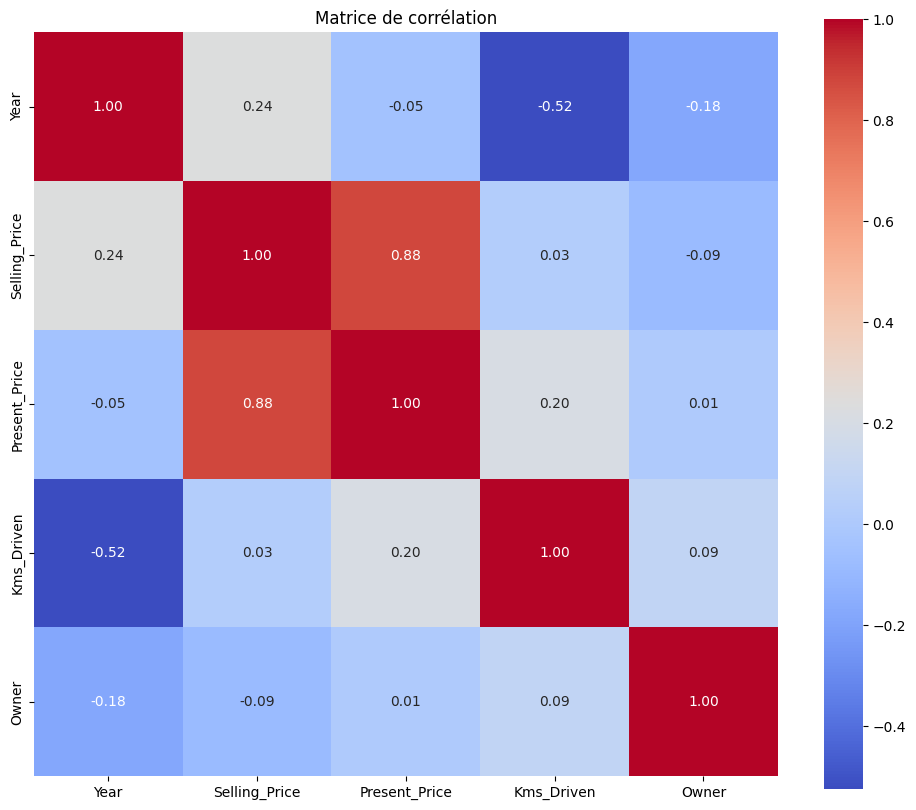

In [53]:
columns_to_keep = ['Year', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner'
    ]

# Filtrer le DataFrame pour ne garder que les colonnes spécifiées
df_filtered = df[columns_to_keep]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Pour utiliser les variables qualitatives dans une matrice de corrélation, il faut les convertir en valeurs quantitativee 

In [ ]:
# Créer les colonnes numériques pour les variables catégorielles
# Fuel_Type
fuel_type_mapping = {"Petrol": 1, "Diesel": 2, "CNG": 3}
df["Fuel_Type_number"] = df["Fuel_Type"].map(fuel_type_mapping)

# Seller_Type
seller_type_mapping = {"Dealer": 1, "Individual": 2}
df["Seller_Type_number"] = df["Seller_Type"].map(seller_type_mapping)

# Transmission
transmission_mapping = {"Manual": 0, "Automatic": 1}
df["Transmission_number"] = df["Transmission"].map(transmission_mapping)

# # Vérifier que les colonnes ont été correctement créées
# df_numeric = df[["Fuel_Type", "Fuel_Type_number", "Seller_Type", "Seller_Type_number", "Transmission", "Transmission_number"]]   
# df_numeric.head()

# df_numeric = df[['Year', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner', "Fuel_Type_number", "Seller_Type_number", "Transmission_number"]] 


,Fuel_Type,Fuel_Type_number,Seller_Type,Seller_Type_number,Transmission,Transmission_number
0,Petrol,1,Dealer,1,Manual,0
1,Diesel,2,Dealer,1,Manual,0
2,Petrol,1,Dealer,1,Manual,0
3,Petrol,1,Dealer,1,Manual,0
4,Diesel,2,Dealer,1,Manual,0


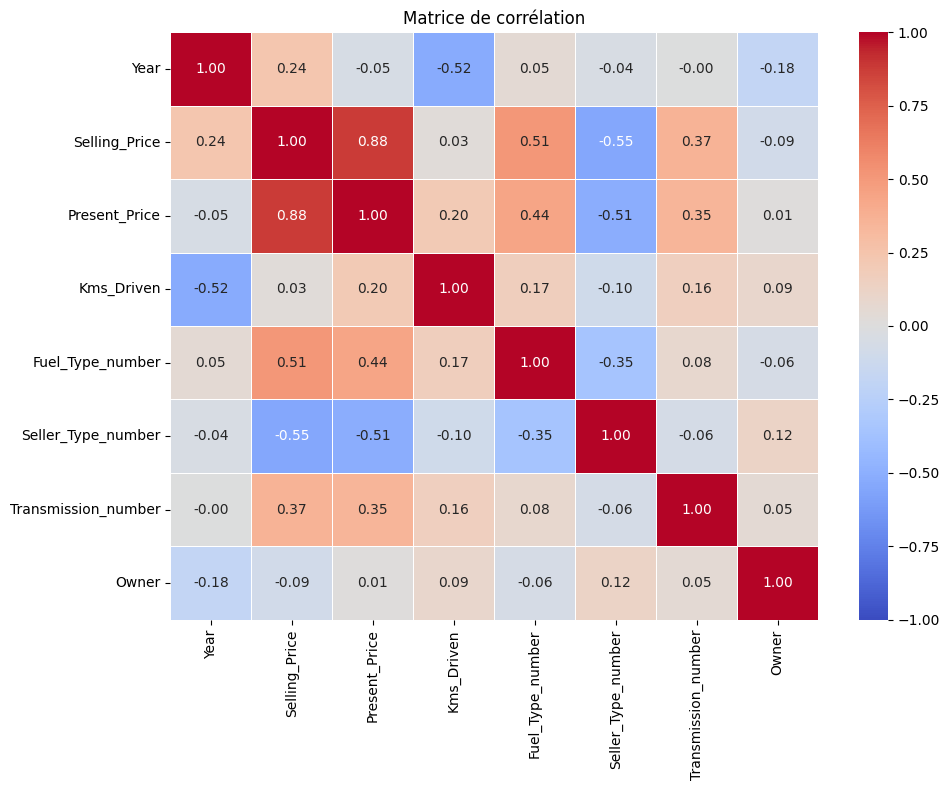

In [ ]:
# Sélectionner les colonnes numériques pour la matrice de corrélation
df_numeric = df[["Year", "Selling_Price", "Present_Price", "Kms_Driven", 
                  "Fuel_Type_number", "Seller_Type_number", "Transmission_number", "Owner"]]

# Créer la matrice de corrélation
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.tight_layout()